In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample

In [338]:
eq_df=pd.read_csv(r'C:\Users\mishra\Downloads\database.csv.zip')

In [339]:
eq_df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [340]:
eq_df.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [341]:
eq_df['Magnitude'].unique()

array([6.  , 5.8 , 6.2 , 6.7 , 5.9 , 8.2 , 5.5 , 5.6 , 6.1 , 8.7 , 5.7 ,
       7.3 , 6.5 , 6.4 , 6.3 , 7.  , 7.4 , 7.6 , 6.8 , 7.7 , 7.2 , 7.8 ,
       6.9 , 6.6 , 7.5 , 7.1 , 6.35, 8.1 , 5.62, 5.63, 7.9 , 5.52, 5.82,
       5.54, 8.  , 5.64, 5.55, 5.67, 5.84, 5.81, 6.47, 6.31, 5.75, 5.66,
       5.51, 6.45, 6.57, 5.77, 5.53, 5.69, 5.89, 5.58, 8.3 , 5.94, 8.4 ,
       6.48, 5.97, 9.1 , 8.6 , 5.88, 8.8 , 5.72, 6.02, 5.73])

In [342]:
eq_df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [343]:
missing_values_columns = [col for col in eq_df.columns
                     if eq_df[col].isnull().any()]
eq_df = eq_df.drop(missing_values_columns, axis=1)
eq_df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [344]:
lengths = eq_df["Date"].str.len()
lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [346]:
wrongdates = np.where([lengths == 24])[1]
wrongdates
eq_df.loc[wrongdates]

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8,USP000HWQP,US,US,GCMT,Reviewed


In [347]:
eq_df.loc[3378, "Date"] = "02/23/1975"  
eq_df.loc[7512, "Date"] = "04/28/1985"
eq_df.loc[20650, "Date"] = "03/13/2011"

In [348]:
eq_df.loc[3378]

Date                              02/23/1975
Time                1975-02-23T02:58:41.000Z
Latitude                               8.017
Longitude                            124.075
Type                              Earthquake
Depth                                  623.0
Magnitude                                5.6
ID                                USP0000A09
Source                                    US
Location Source                           US
Magnitude Source                          US
Status                              Reviewed
Name: 3378, dtype: object

In [349]:
eq_df.dtypes

Date                 object
Time                 object
Latitude            float64
Longitude           float64
Type                 object
Depth               float64
Magnitude           float64
ID                   object
Source               object
Location Source      object
Magnitude Source     object
Status               object
dtype: object

In [350]:
eq_df['Date']= pd.to_datetime(eq_df['Date'])
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              23412 non-null  datetime64[ns]
 1   Time              23412 non-null  object        
 2   Latitude          23412 non-null  float64       
 3   Longitude         23412 non-null  float64       
 4   Type              23412 non-null  object        
 5   Depth             23412 non-null  float64       
 6   Magnitude         23412 non-null  float64       
 7   ID                23412 non-null  object        
 8   Source            23412 non-null  object        
 9   Location Source   23412 non-null  object        
 10  Magnitude Source  23412 non-null  object        
 11  Status            23412 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 2.1+ MB


In [351]:
eq_df.drop('Time',axis=1,inplace=True)

In [352]:
eq_df.columns

Index(['Date', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [353]:
eq_df.dtypes

Date                datetime64[ns]
Latitude                   float64
Longitude                  float64
Type                        object
Depth                      float64
Magnitude                  float64
ID                          object
Source                      object
Location Source             object
Magnitude Source            object
Status                      object
dtype: object

In [354]:
import seaborn as sns

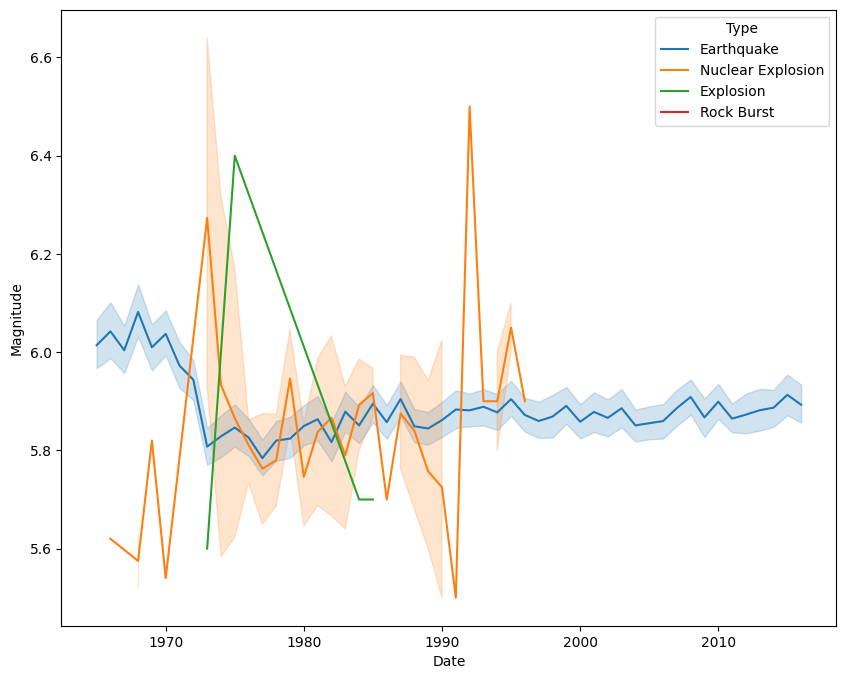

In [355]:
plt.figure(figsize=(10,8))
Time_series=sns.lineplot(x=eq_df['Date'].dt.year,y='Magnitude',hue='Type',data=eq_df, color="#ffa600")


In [356]:
eq_df.columns

Index(['Date', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [357]:
eq_df['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [358]:
eq_df.head()
        

,Date,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [359]:
eq_df['Type'].replace( ['Earthquake','Nuclear Explosion',
                        'Explosion','Rock Burst'], [0,1,2,3] , inplace=True)

In [360]:
eq_df['Type'].value_counts()

0    23232
1      175
2        4
3        1
Name: Type, dtype: int64

In [286]:
eq_df['Date']=eq_df['Date'].replace([eq_df['Date']],[eq_df['Date'].dt.year])

In [288]:
eq_df.head()

,Date,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status
0,1965,19.246,145.616,0,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965,1.863,127.352,0,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965,-20.579,-173.972,0,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965,-59.076,-23.557,0,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965,11.938,126.427,0,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [363]:
category=pd.cut(eq_df.Magnitude,bins=[5,5.5,6,6.5,7,7.5,8,8.5,9,9.5],labels=['moderate','strong','major','great'])
eq_df.insert(7,'Class',category)

In [364]:
eq_df

,Date,Latitude,Longitude,Type,Depth,Magnitude,ID,Class,Source,Location Source,Magnitude Source,Status
0,1965-01-02,19.2460,145.6160,0,131.60,6.0,ISCGEM860706,moderate,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04,1.8630,127.3520,0,80.00,5.8,ISCGEM860737,moderate,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05,-20.5790,-173.9720,0,20.00,6.2,ISCGEM860762,strong,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08,-59.0760,-23.5570,0,15.00,5.8,ISCGEM860856,moderate,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09,11.9380,126.4270,0,15.00,5.8,ISCGEM860890,moderate,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28,38.3917,-118.8941,0,12.30,5.6,NN00570710,moderate,NN,NN,NN,Reviewed
23408,2016-12-28,38.3777,-118.8957,0,8.80,5.5,NN00570744,moderate,NN,NN,NN,Reviewed
23409,2016-12-28,36.9179,140.4262,0,10.00,5.9,US10007NAF,moderate,US,US,US,Reviewed
23410,2016-12-29,-9.0283,118.6639,0,79.00,6.3,US10007NL0,strong,US,US,US,Reviewed


In [290]:
eq_df.isnull().sum()
len(eq_df)

23412

In [315]:
feature=eq_df[['Date', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude']]
feature

,Date,Latitude,Longitude,Type,Depth,Magnitude
0,1965,19.2460,145.6160,0,131.60,6.0
1,1965,1.8630,127.3520,0,80.00,5.8
2,1965,-20.5790,-173.9720,0,20.00,6.2
3,1965,-59.0760,-23.5570,0,15.00,5.8
4,1965,11.9380,126.4270,0,15.00,5.8
...,...,...,...,...,...,...
23407,2016,38.3917,-118.8941,0,12.30,5.6
23408,2016,38.3777,-118.8957,0,8.80,5.5
23409,2016,36.9179,140.4262,0,10.00,5.9
23410,2016,-9.0283,118.6639,0,79.00,6.3


In [316]:
x=np.asarray(feature)

array([[ 1.96500e+03,  1.92460e+01,  1.45616e+02,  0.00000e+00,
         1.31600e+02,  6.00000e+00],
       [ 1.96500e+03,  1.86300e+00,  1.27352e+02,  0.00000e+00,
         8.00000e+01,  5.80000e+00],
       [ 1.96500e+03, -2.05790e+01, -1.73972e+02,  0.00000e+00,
         2.00000e+01,  6.20000e+00],
       [ 1.96500e+03, -5.90760e+01, -2.35570e+01,  0.00000e+00,
         1.50000e+01,  5.80000e+00],
       [ 1.96500e+03,  1.19380e+01,  1.26427e+02,  0.00000e+00,
         1.50000e+01,  5.80000e+00]])

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [306]:
'''80:20 partition'''
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
x_train.shape

(18729, 6)

In [305]:
x_test.shape

(4683, 6)

In [303]:
y_train.shape

(18729,)

In [301]:
y_test.shape

(4683,)

In [311]:
from sklearn import svm
#gamma=co-efficient ,C=penalty
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'